In [1]:
import os
import glob
import numpy as np
from sklearn.preprocessing import robust_scale
from astropy.io import fits
from castor import spec2sqr

In [2]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings as war
war.filterwarnings("ignore")

In [32]:
from ipywidgets import interact, IntRangeSlider
from IPython.display import display

In [3]:
PATH = "/mnt/arch/SKODA/spectra/"
I2CS = glob.glob(PATH+"*.???")
FITS = I2CS[0]
N = fits.getval(FITS, "NAXIS1")
ID = fits.getval(FITS, "ID")
SPEC = fits.getdata(FITS)
CRVAL = fits.getval(FITS, "CRVAL1")
CDELT = fits.getval(FITS, "CDELT1")
WAVE = CRVAL + CDELT * np.arange(N)
LAME = 1 / WAVE * 1e8
assert len(LAME) == len(WAVE) == len(SPEC) == N

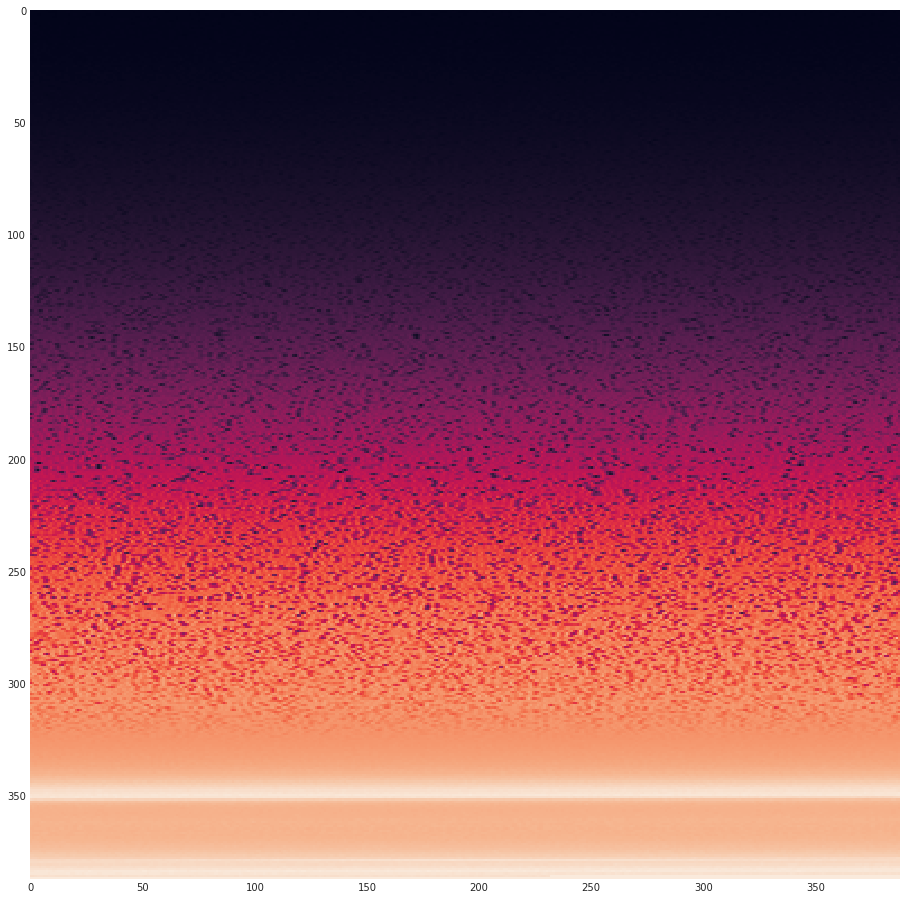

In [9]:
plt.figure(figsize=(16,16))
plt.imshow(spec2sqr(robust_scale(SPEC[50000:200000])))
plt.grid(False)

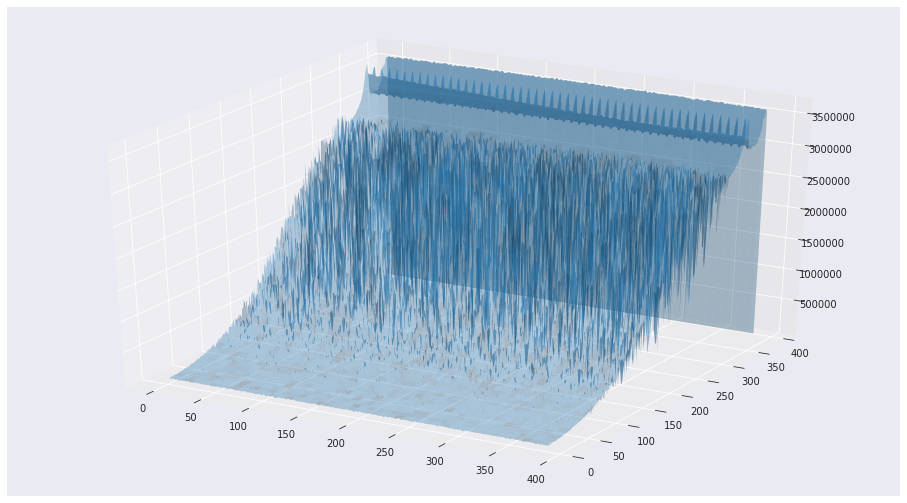

In [25]:
plt.figure(figsize=(16,9))
ax = plt.subplot(projection="3d")
sqr = spec2sqr((SPEC[50000:200000]))
x = np.linspace(start=1, stop=sqr.shape[0], num=sqr.shape[1]),
y = np.linspace(start=1, stop=sqr.shape[1], num=sqr.shape[0]),
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, Z=sqr, alpha=0.33)
plt.grid(False)

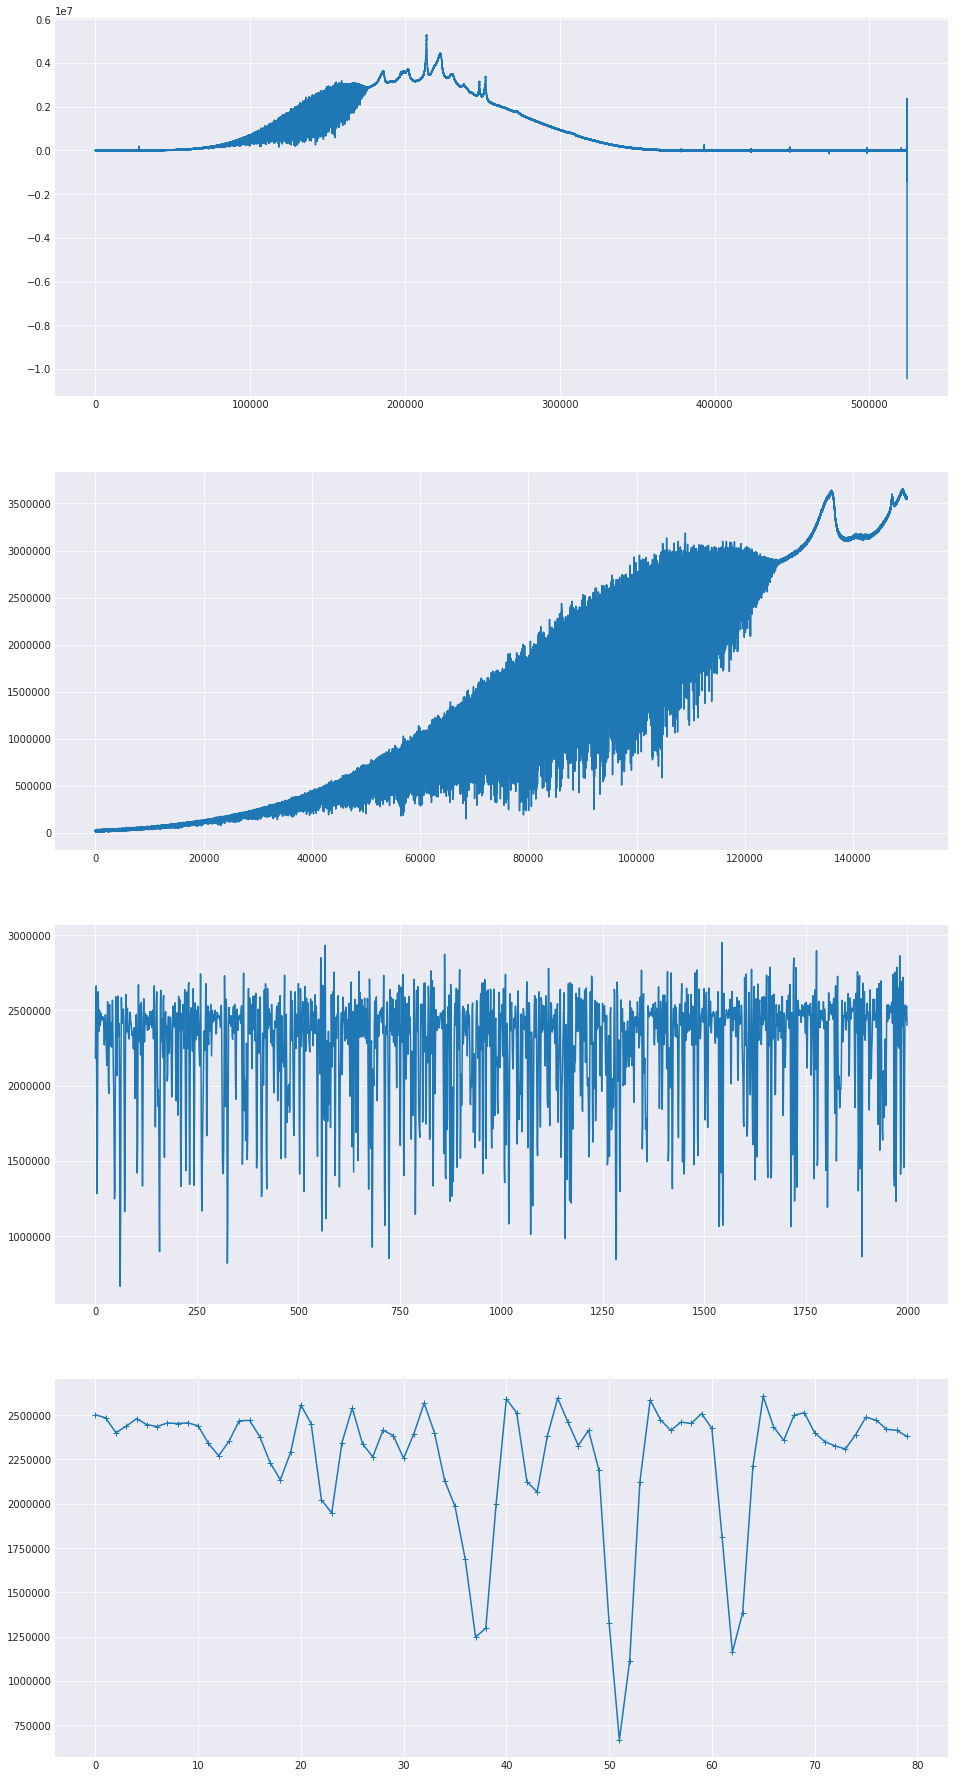

In [28]:
plt.figure(figsize=(16, 32))
plt.subplot(411); plt.plot(SPEC)
plt.subplot(412); plt.plot(SPEC[50000:200000])
plt.subplot(413); plt.plot(SPEC[149000:151000])
plt.subplot(414); plt.plot(SPEC[149010:149090], marker="+")

```python
plt.figure(num=1, figsize=(18, 256))    
cut = I2CS[0:20]+I2CS[25:-5]
assert len(cut) == 40
n = 1
l = len(cut)
for i in I2CS[0:20]+I2CS[25:-5]:
    try:
        tit = fits.getval(i, "ID")
        spec = fits.getdata(i)
        plt.subplot(l, 1, n)
            plt.title(tit)
        plt.plot(robust_scale(spec))
        n += 1
    except:
        print(i)
plt.savefig("i2c.png", bbox_inches="tight")
plt.close(1)
```

In [33]:
print("Done!")

Done!
